<a href="https://colab.research.google.com/github/nik45123/llava-visualchatbot/blob/main/Llava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers==4.37.2
!pip install bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 28.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinu

In [2]:
import torch
from transformers import BitsAndBytesConfig, pipeline

In [3]:
quant_config = BitsAndBytesConfig(
    load_in_4bit = True,
    bnb_4bit_compute_dtype = torch.float16
)

In [4]:
model_id = "llava-hf/llava-1.5-7b-hf"

In [5]:
pipe = pipeline(
    "image-to-text",
    model=model_id,
    model_kwargs={"quantization_config": quant_config}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [6]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS
from PIL import Image

In [7]:
pipe

In [16]:
image_path = 'skin-infection-specialist-passadena-texas-city.png'

In [18]:
image = Image.open((image_path))

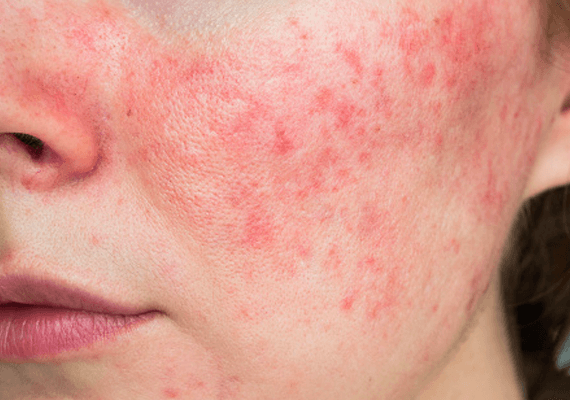

In [19]:
image

In [20]:
import nltk
nltk.download("punkt")
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
max_new_tokens = 250

In [22]:
prompt_instructions = """
Describe the image using as much as detail as possible
Your are a skin specalist doctor assistant with highly experience in this field,
who is able to answer questions about the image.
What is the image all about?
Now generat the helpful answer.
"""

In [23]:
prompt = "User: <image>\n" + prompt_instructions + "\nAssistant:"

In [24]:
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})

In [25]:
outputs

[{'generated_text': "User:  \n\nDescribe the image using as much as detail as possible\nYour are a skin specalist doctor assistant with highly experience in this field,\nwho is able to answer questions about the image.\nWhat is the image all about?\nNow generat the helpful answer.\n\nAssistant: The image shows a close-up of a person's face, focusing on their nose and the surrounding skin. The skin appears to be red and bumpy, possibly indicating an issue such as acne or rosacea. The person's nose is visible in the foreground, with the skin condition surrounding it. The image provides a detailed view of the skin condition, allowing for a better understanding of the situation."}]

In [26]:
for sent in sent_tokenize(outputs[0]["generated_text"]):
  print(sent)

User:  

Describe the image using as much as detail as possible
Your are a skin specalist doctor assistant with highly experience in this field,
who is able to answer questions about the image.
What is the image all about?
Now generat the helpful answer.
Assistant: The image shows a close-up of a person's face, focusing on their nose and the surrounding skin.
The skin appears to be red and bumpy, possibly indicating an issue such as acne or rosacea.
The person's nose is visible in the foreground, with the skin condition surrounding it.
The image provides a detailed view of the skin condition, allowing for a better understanding of the situation.


In [27]:
warnings.filterwarnings("ignore")

In [28]:
import numpy as np

In [29]:
torch.cuda.is_available()

True

In [30]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [31]:
print(f"Using torch {torch.__version__} ({DEVICE})")

Using torch 2.2.1+cu121 (cuda)


In [32]:
import whisper

In [33]:
model = whisper.load_model("medium", device=DEVICE)

100%|█████████████████████████████████████| 1.42G/1.42G [01:00<00:00, 25.3MiB/s]


In [34]:
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'}"
    f"and has {sum(np.prod(v.shape) for v in model.parameters()):,} parameters."
)

Model is multilingualand has 762,321,920 parameters.


In [35]:
import re
import datetime

In [36]:
##Logger fiel
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(" ", "_")
logfile = f"log_{tstamp}.txt"

In [37]:
def writehistory(text):
  with open(logfile, "a", encoding="utf-8") as f:
    f.write(text)
    f.write("\n")
  f.close()

In [38]:
import requests

In [39]:
def img2txt(input_text, input_image):

    # load the image
    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
        Describe the image using as much as detail as possible
        Your are a X-ray specalist doctor assistant with highly experience in this field,
        Only by seeing X-ray images you will be able to give suggestions and telling what kind of disease person has.
        who is able to answer questions about the image.
        What is the image all about?
        Now generat the helpful answer.
        """
    else:
        prompt_instructions = """
        Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
        """ + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

    # Properly extract the response text
    if outputs is not None and len(outputs[0]["generated_text"]) > 0:
       match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])
       if match:
          # Extract the text after "ASSISTANT:"
          reply = match.group(1)
       else:
          reply = "No response found."
    else:
      reply = "No response generated."

    return reply

In [40]:
def transcribe(audio):

  # Check if the audio input is None or empty
  if audio is None or audio == "":
    return ("", "", None) # Return empty strings and None audio file

  # language = "en"

  audio = whisper.load_audio(audio)
  audio = whisper.pad_or_trim(audio)

  mel = whisper.log_mel_spectrogram(audio).to(model.device)

  _, probs = model.detect_language(mel)

  options = whisper.DecodingOptions()
  result = whisper.decode(model, mel, options)
  result_text = result.text

  return result_text

In [41]:
def text_to_speech(text, file_path):
  language = "en"

  audioobj = gTTS(text = text,
                  lang = language,
                  slow = False)

  audioobj.save(file_path)

  return file_path

In [42]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [43]:
!!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 - acodec libmp3lame Temp.mp3

['ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers',
 '  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)',
 '  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-lib

In [ ]:
import gradio as gr
import base64
import os

# A function to handle audio and image inputs
def process_inputs(audio_path, image_path):
  # Process the audio file (assuming this is handled by a function called 'transcribe')
  speech_to_text_output = transcribe(audio_path)

  # Handle the image input
  if image_path:
    chatgpt_output = img2txt(speech_to_text_output, image_path)
  else:
    chatgpt_output = "No image provided."

  # Assuming 'transcribe' also returns the path to a processed audio file
  processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3") # Replace with actual path

  return speech_to_text_output, chatgpt_output, processed_audio_path

# Create the interface
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="AI Output"),
        gr.Audio("Temp.mp3")
    ],
    title = "LLM Powered Voice Assitant for Medical",
    description = "Upload an image and interact via voice input and audio response."
)

# Launch the interface
iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://aa054e623ebf6342c6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
